In [9]:
import pandas as pd

table1 = pd.DataFrame({
                        'Uv, mV': [61, 73.5, 79.5, 86, 92, 97, 104],
                        'Ia, mA': [147.7, 178.74, 193, 208.45, 223.45, 236.83, 252.8],},  index= [1, 2, 3, 4, 5, 6, 7])
table1.index.name = 'N изм'
table1

,"Uv, mV","Ia, mA"
N изм,,
1,61.0,147.70
2,73.5,178.74
3,79.5,193.00
4,86.0,208.45
5,92.0,223.45
6,97.0,236.83
7,104.0,252.80


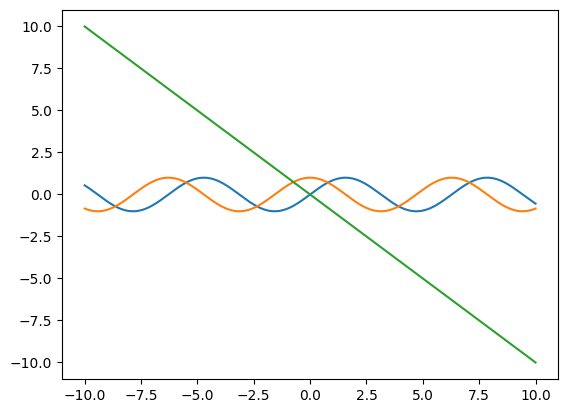

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10.01, 0.01)
plt.plot(x, np.sin(x), x, np.cos(x), x, -x)
plt.show()

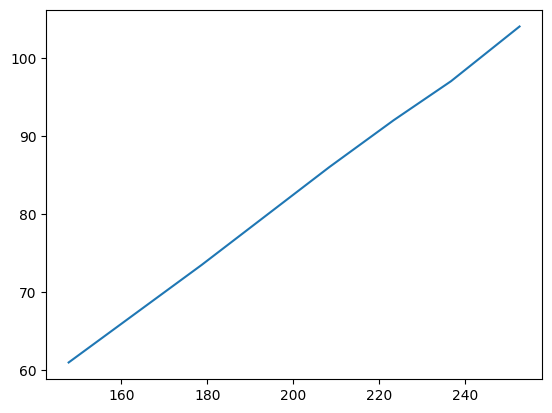

In [11]:
plt.plot(table1['Ia, mA'], table1['Uv, mV'])
plt.show()